A Multilayer Neural Network implementation using TensorFlow library.

This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)


In [1]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# For plotting results
import matplotlib.pyplot as plt

In [3]:
# The MNIST test set consists of 10,000 sample images. Each image consists of 784 pixels.
mnist.test.images.shape

(10000, 784)

In [4]:
# There are 10 possible output values (the ten digits).
mnist.test.labels.shape

(10000, 10)

In [5]:
mnist.test.num_examples

10000

In [6]:
import tensorflow as tf

In [7]:
# Learning parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

In [8]:
# Network Parameters
n_hidden_1 = 64  # 1st layer number of hidden units
n_hidden_2 = 16  # 2nd layer number of hidden units

In [9]:
n_input = 784  # MNIST data input (img shape: 28 * 28)
n_classes = 10  # MNIST total classes (0-9 digits)

In [10]:
# input
x = tf.placeholder("float", [None, n_input])
# output
y = tf.placeholder("float", [None, n_classes])

In [11]:
# weight & bias
W = {
  'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
  'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
  'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
b = {
  'b1': tf.Variable(tf.random_normal([n_hidden_1])),
  'b2': tf.Variable(tf.random_normal([n_hidden_2])),
  'out': tf.Variable(tf.random_normal([n_classes]))
}

In [13]:
# TODO: Define the model with two hidden and one output layer
def multilayer_nn(x, weights, biases):
    # TODO: Define two connected hidden layers with RELU activations
    layer_1 = tf.nn.relu(tf.matmul(x, W['h1']) + b['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, W['h2']) + b['b2'])
    # TODO: Define the output layer with linear activation
    out_layer = tf.sigmoid(tf.matmul(layer_2, W['out']) + b['out'])
    return out_layer

In [14]:
# Construct model
pred = multilayer_nn(x, W, b)

In [15]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
# Initializing the variables
init = tf.global_variables_initializer()

In [19]:
%%time
x_plot = []
y_plot = []

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost = ", "{:.9f}".format(avg_cost))
        
        # For plotting results
        x_plot.append(epoch)
        y_plot.append(avg_cost)
        
    print("Optimization Finished!")
    
    # Note: Had to move the below code inside the "with tf.Session() as sess" section, to avoid the following error:
    # "Attempted to use a closed Session."
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    test_accuracy = sess.run(accuracy, feed_dict = {x: mnist.test.images, y: mnist.test.labels})
    print("Accuracy:", test_accuracy)
    
    # TODO Plot a confusion matrix (true labels vs predictions using tf.confusion_matrix)
    confusion = tf.confusion_matrix(labels=tf.argmax(mnist.test.labels, 1), predictions=tf.argmax(pred, 1), num_classes=n_classes)
    print(confusion.eval({x: mnist.test.images, y: mnist.test.labels}))


Epoch: 0001 cost =  2.173938173
Epoch: 0002 cost =  1.862805774
Epoch: 0003 cost =  1.754983479
Epoch: 0004 cost =  1.701709395
Epoch: 0005 cost =  1.667755971
Epoch: 0006 cost =  1.642583607
Epoch: 0007 cost =  1.622183540
Epoch: 0008 cost =  1.607628408
Epoch: 0009 cost =  1.595822213
Epoch: 0010 cost =  1.587080587
Epoch: 0011 cost =  1.579954366
Epoch: 0012 cost =  1.571594199
Epoch: 0013 cost =  1.566526131
Epoch: 0014 cost =  1.561343756
Epoch: 0015 cost =  1.557501265
Optimization Finished!
Accuracy: 0.867
[[ 955    0    4    2    0    6    8    0    5    0]
 [   1 1111    4    2    2    2    3    1    9    0]
 [  33    9  911   27    8    4   10   12   16    2]
 [  18    4   41  882    2   18    2   13   25    5]
 [  18    5   19    0  899    5   12    2    4   18]
 [  30    1    8  138    8  674   14    2   16    1]
 [  30    6    9    1   27   36  845    2    2    0]
 [  13   19   26   16   25    1    3  902    5   18]
 [  19   13   12   45   11   67   37   15  749    6]
 [  

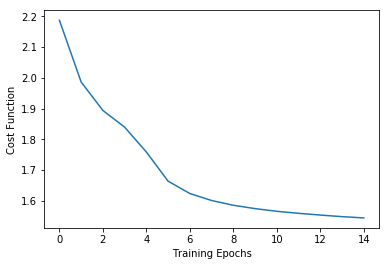

In [18]:
# Plotting the cost value across training epochs
plt.plot(x_plot, y_plot)
plt.xlabel('Training Epochs')
plt.ylabel('Cost Function')
plt.show()